***Deep Learning models***
- RNN (LSTM) 
- CNN (1D Convolutional Neural Network),
- Pre-trained models from Hugging Face for your classification task

These models can potentially provide better performance by leveraging sequence data and pre-trained knowledge.

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Embedding, Dropout, SpatialDropout1D, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [2]:
import tensorflow as tf
from transformers import DistilBertTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

s:\Data Science by DigiCrome\Internship\Project_7\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

In [5]:
Data = pd.read_csv("./preprocessed_dataset.csv")

In [6]:
Data.columns

Index(['id', 'keyword', 'location', 'text', 'target', 'cleaned_text',
       'tokens'],
      dtype='object')

In [7]:
Data.dtypes

id               int64
keyword         object
location        object
text            object
target           int64
cleaned_text    object
tokens          object
dtype: object

In [73]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [74]:
tfidf_vectorizer.fit(Data['cleaned_text'])

TfidfVectorizer(max_features=5000)

In [76]:
# Save the TF-IDF vectorizer for future use
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
print("TF-IDF vectorizer saved successfully.")

TF-IDF vectorizer saved successfully.


In [8]:
# Prepare the text Data (Pad the sequences)
tokenizer = Tokenizer(num_words = 5000)

In [9]:
Data['cleaned_text'] = Data['cleaned_text'].astype(str)

In [10]:
tokenizer.fit_on_texts(Data['cleaned_text'])
X_text_seq = tokenizer.texts_to_sequences(Data['cleaned_text'])

In [11]:
# Save the tokenizer for future use
joblib.dump(tokenizer, 'tokenizer.pkl')
print("tokenizer saved successfully.")

tokenizer saved successfully.


In [10]:
print(X_text_seq)

[[110, 4258, 20, 1, 795, 5, 18, 233, 128, 1815, 4259, 66, 43], [177, 38, 215, 609, 1298], [43, 1643, 1513, 4, 2005, 3, 659, 20, 121, 17, 1644, 41, 412, 248, 54, 2005, 3, 659, 1299, 20, 1027], [55, 4260, 1300, 248, 1299, 3, 85], [27, 96, 1213, 18, 304, 19, 2006, 25, 241, 19, 1300, 65, 2, 173], [2699, 385, 85, 1398, 796, 3, 610, 556, 4, 1079, 351, 38, 4261, 1300], [211, 72, 797, 290, 1130, 835, 234, 5, 1645, 3, 1214, 2274, 1514], [31, 10, 212, 5, 1, 1816, 6, 7, 71, 105, 2, 38, 3, 1, 4262], [283, 42, 70, 248, 1215, 50, 3, 1, 557, 798, 1, 799], [31, 2275, 15, 1, 507, 8, 223, 4, 110, 305], [558, 55, 586, 19, 1, 249, 413, 29, 611], [800, 639, 2700, 8, 200, 2701, 3306, 660, 2, 640, 7, 193, 3, 639, 2700, 56, 144, 7, 291, 67, 56, 144, 7, 291, 67, 234], [2702, 234, 1646, 2700, 54, 559, 271, 732, 3307], [211, 3, 4263, 879, 46, 1647, 4263], [216, 4, 173, 441, 10, 3, 4264, 115, 83, 306], [612, 26, 92], [7, 108, 4265], [322, 8, 1648], [12, 115, 8, 29, 733], [56, 2], [18, 8, 3308], [969, 8, 508], [10

In [11]:
X_text_padded = pad_sequences(X_text_seq, maxlen=200)

In [12]:
X_text_padded

array([[   0,    0,    0, ..., 4259,   66,   43],
       [   0,    0,    0, ...,  215,  609, 1298],
       [   0,    0,    0, ..., 1299,   20, 1027],
       ...,
       [   0,    0,    0, ...,    5,  605, 1503],
       [   0,    0,    0, ..., 4997, 2455,  282],
       [   0,    0,    0, ...,  159,  652,   62]], dtype=int32)

In [13]:
y = Data['target']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_text_padded, y, test_size=0.2, random_state=42)

1. Recurrent Neural Network (RNN - LSTM):

    RNNs (specifically LSTM or GRU) are great for handling sequence data like text.

    LSTM is a type of RNN that works well with long-term dependencies in sequences.

In [15]:
# Define the RNN (LSTM) model
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=5000, output_dim=128))
model_rnn.add(SpatialDropout1D(0.2))  # Dropout for regularization
model_rnn.add(LSTM(128, return_sequences=True))
model_rnn.add(Dropout(0.2))
model_rnn.add(LSTM(64))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(1, activation='sigmoid'))

In [16]:
# Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy'])

In [17]:
model_rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Train the model
history_rnn = model_rnn.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 15s 169ms/step - accuracy: 0.6003 - loss: 0.6545 - val_accuracy: 0.7783 - val_loss: 0.4752
Epoch 2/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.8470 - loss: 0.3716 - val_accuracy: 0.7874 - val_loss: 0.4758
Epoch 3/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 167ms/step - accuracy: 0.8942 - loss: 0.2759 - val_accuracy: 0.7808 - val_loss: 0.5200
Epoch 4/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.9206 - loss: 0.2103 - val_accuracy: 0.7611 - val_loss: 0.6011
Epoch 5/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - accuracy: 0.9403 - loss: 0.1654 - val_accuracy: 0.7578 - val_loss: 0.6769


In [19]:
# Evaluate the model
test_loss, test_acc = model_rnn.evaluate(x_test, y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7528 - loss: 0.7245


In [20]:
print(f"Test Accuracy for RNN (LSTM) : {test_acc:.4f}")

Test Accuracy for RNN (LSTM) : 0.7649


-----------------------------------------

2. Convolutional Neural Network (CNN - 1D Convolution):

    CNNs can be used for text classification by applying 1D convolution to extract local features from sequences of words.

In [21]:
# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=5000, output_dim= 128))
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2)) # Max pooling layer
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))  # Dense layer
model_cnn.add(Dropout(0.2)) # Dropout for regularization
model_cnn.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

In [22]:
# Compile the model
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
# Train the model
history_cnn = model_cnn.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5991 - loss: 0.6545 - val_accuracy: 0.7991 - val_loss: 0.4467
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8574 - loss: 0.3513 - val_accuracy: 0.7623 - val_loss: 0.4896
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9035 - loss: 0.2574 - val_accuracy: 0.7820 - val_loss: 0.5320
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9465 - loss: 0.1607 - val_accuracy: 0.7787 - val_loss: 0.6261
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9618 - loss: 0.1078 - val_accuracy: 0.7682 - val_loss: 0.7217


In [24]:
# Summary of the model architecture
model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 198, 64)        │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 99, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6336)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │       405,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,210,821 (12.25 MB)

 Trainable params: 1,070,273 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,140,548 (8.17 MB)

In [25]:
# Evaluate the model on the test data
test_loss, test_acc = model_cnn.evaluate(x_test, y_test)
print(f"Test Accuracy for CNN: {test_acc:.4f}")

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7508 - loss: 0.7807
Test Accuracy for CNN: 0.7682


In [37]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Disaster', 'Disaster'], yticklabels=['Non-Disaster', 'Disaster'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [39]:
print(len(x_test))  # Number of samples in test data
print(len(y_test))  # Number of true labels in test data

1523
1523


In [45]:
x_train.shape

(6090, 200)

In [46]:
y_train.shape

(6090,)

In [ ]:
# Make sure you are using the padded test data (which should match x_test in terms of sample size)
y_pred_rnn = model_rnn.predict(x_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [48]:
# Threshold the predictions for binary classification
y_pred_rnn = (y_pred_rnn > 0.5)

In [49]:
y_pred_rnn.shape

(1523, 1)

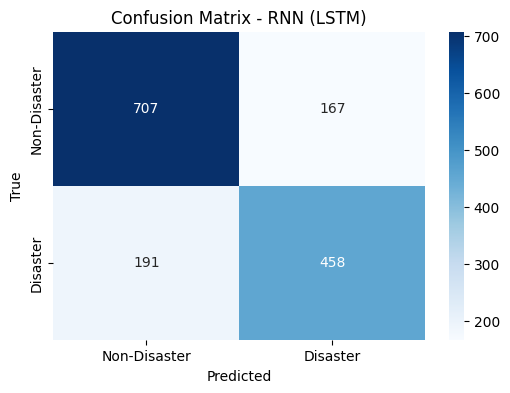

In [50]:
# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_rnn, "RNN (LSTM)")

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


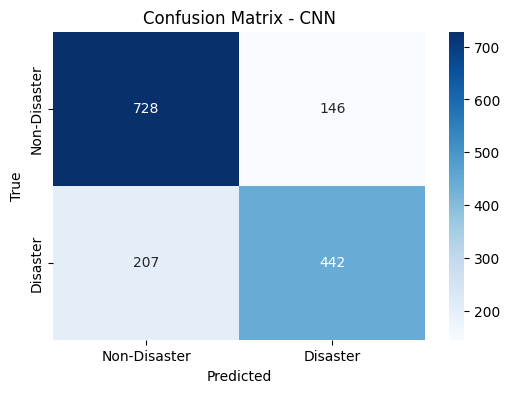

In [52]:
# For CNN
y_pred_cnn = model_cnn.predict(x_test)
y_pred_cnn = (y_pred_cnn > 0.5)  # Threshold for binary classification
plot_confusion_matrix(y_test, y_pred_cnn, "CNN")

***ROC Curve***

In [53]:
def plot_roc_curve(y_true, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


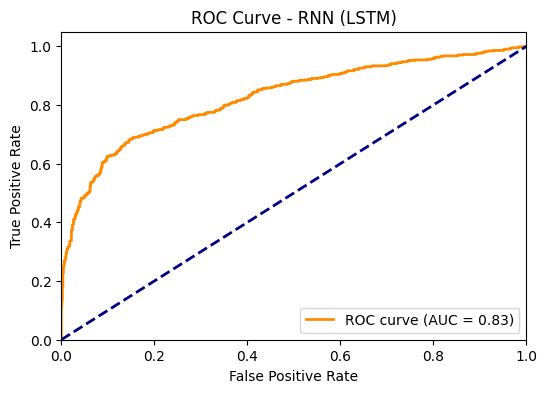

In [55]:
# For RNN
y_pred_rnn = model_rnn.predict(x_test)
plot_roc_curve(y_test, y_pred_rnn, "RNN (LSTM)")

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


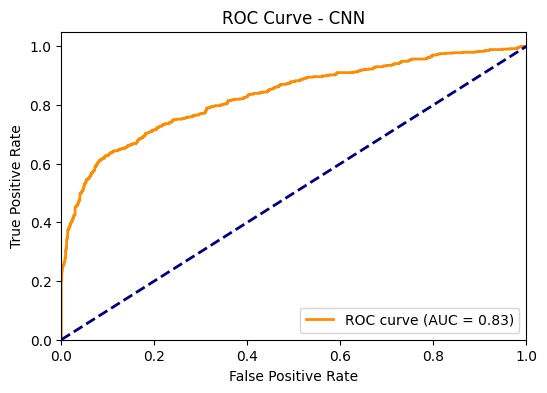

In [57]:
# For CNN
y_pred_cnn = model_cnn.predict(x_test)
plot_roc_curve(y_test, y_pred_cnn, "CNN")

***Precision-Recall Curve***

In [58]:
def plot_precision_recall_curve(y_true, y_pred, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc='best')
    plt.show()

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


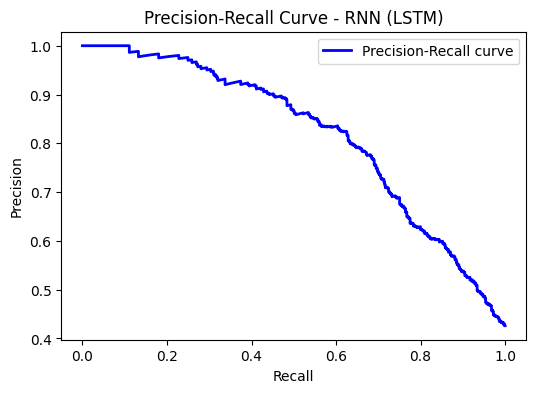

In [59]:
# For RNN
y_pred_rnn = model_rnn.predict(x_test)
y_pred_rnn = y_pred_rnn.flatten()  # Ensure it's a 1D array for PR curve
plot_precision_recall_curve(y_test, y_pred_rnn, "RNN (LSTM)")

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


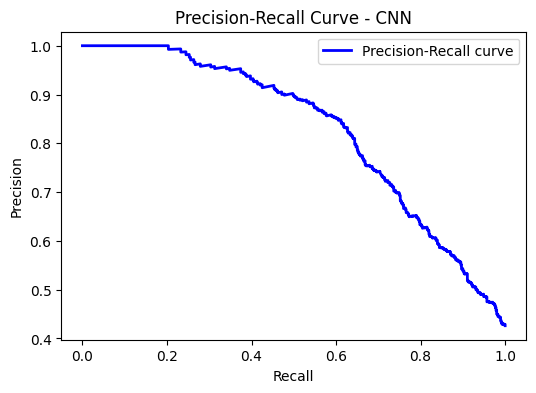

In [60]:
# For CNN
y_pred_cnn = model_cnn.predict(x_test)
y_pred_cnn = y_pred_cnn.flatten()  # Ensure it's a 1D array for PR curve
plot_precision_recall_curve(y_test, y_pred_cnn, "CNN")

***Model Comparison***

In [62]:
# Convert continuous predictions to binary labels (threshold at 0.5)
y_pred_rnn_binary = (y_pred_rnn > 0.5)  # If the probability > 0.5, it's class 1 (disaster), else class 0 (non-disaster)
y_pred_cnn_binary = (y_pred_cnn > 0.5)  # Same for CNN predictions

In [64]:
# For RNN (LSTM)
fpr_rnn, tpr_rnn, _ = roc_curve(y_test, y_pred_rnn)  # y_pred_rnn is the continuous probabilities
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)  # AUC for RNN

# For CNN
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_cnn)  # y_pred_cnn is the continuous probabilities
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)  # AUC for CNN

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Store model metrics for RNN and CNN
models_metrics = {
    "RNN (LSTM)": {
        "Accuracy": accuracy_score(y_test, y_pred_rnn_binary),
        "Precision": precision_score(y_test, y_pred_rnn_binary),
        "Recall": recall_score(y_test, y_pred_rnn_binary),
        "F1 Score": f1_score(y_test, y_pred_rnn_binary),
        "AUC": roc_auc_rnn,  # AUC for RNN
    },
    "CNN": {
        "Accuracy": accuracy_score(y_test, y_pred_cnn_binary),
        "Precision": precision_score(y_test, y_pred_cnn_binary),
        "Recall": recall_score(y_test, y_pred_cnn_binary),
        "F1 Score": f1_score(y_test, y_pred_cnn_binary),
        "AUC": roc_auc_cnn,  # AUC for CNN
    },
}

In [69]:
# Print the metrics for both models
for model_name, metrics in models_metrics.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

Model: RNN (LSTM)
Accuracy: 0.7649
Precision: 0.7328
Recall: 0.7057
F1 Score: 0.7190
AUC: 0.8253


Model: CNN
Accuracy: 0.7682
Precision: 0.7517
Recall: 0.6810
F1 Score: 0.7146
AUC: 0.8305




***Observation***
- Both models have similar accuracy (around 76%), but CNN has a slight edge with 0.7682 compared to 0.7649 for RNN (LSTM).
- CNN has a higher precision (0.7517) compared to RNN (LSTM) (0.7328).
    - Higher precision means the CNN model is better at predicting disasters and is less likely to label non-disasters as disasters.
- RNN (LSTM) has a higher recall (0.7057) compared to CNN (0.6810).
    - Higher recall indicates that the RNN (LSTM) is better at identifying actual disasters (i.e., it misses fewer true positive disaster cases).
-The F1 score is a balance of precision and recall. RNN (LSTM) has a slightly higher F1 score (0.7190) compared to CNN (0.7146), but the difference is quite small.
- CNN has a slightly better AUC (0.8305) compared to RNN (LSTM) (0.8253).
    - AUC indicates the model's ability to distinguish between classes (disaster vs. non-disaster). Both models are performing similarly here, but CNN is marginally better.

***Final Take***

Choose CNN for better precision and slightly better AUC, because it minimize false positives and ensure faster inference.

In [66]:
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

------------------------------------

Serialize the Model for Deployment

In [ ]:
# Save the trained CNN model to a file
joblib.dump(model_cnn, 'cnn_model.pkl')
print("Model saved successfully.")

Model saved successfully.
